In [1]:
import pandas as pd
import gspread
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pa_functions as pa

In [2]:
creds = pa.get_creds(r'C:\Users\joao.batista\Desktop\scripts\token.json')

In [24]:
df = pa.get_sheets(creds, '1OPV3tEMf39yQo6teK4pQyXezbtUc5887HF5ZDdPh9OU', 'turnover')
df.head()

,Data,Guide Shop,Company
1,05/23,"0,038","0,026"
2,06/23,"0,030","0,035"
3,07/23,"0,028","0,022"
4,08/23,"0,036","0,025"
5,09/23,"0,025","0,024"


In [37]:
df.dtypes

0
Data           object
Guide Shop    float64
Company       float64
dtype: object

In [36]:
df

,Data,Guide Shop,Company
1,05/23,0.038,0.026
2,06/23,0.030,0.035
3,07/23,0.028,0.022
4,08/23,0.036,0.025
5,09/23,0.025,0.024
6,10/23,0.029,0.022
7,11/23,0.016,0.020
8,12/23,0.028,0.024
9,01/24,0.016,0.008
10,02/24,0.056,0.024


In [34]:
df['Guide Shop'] = df['Guide Shop'].str.replace(',','.').astype(float)


AttributeError: Can only use .str accessor with string values!

In [35]:
df['Company'] = df['Company'].str.replace(',','.').astype(float)


In [38]:
df_long = df.melt('Data', var_name='Segmento', value_name='Valor')


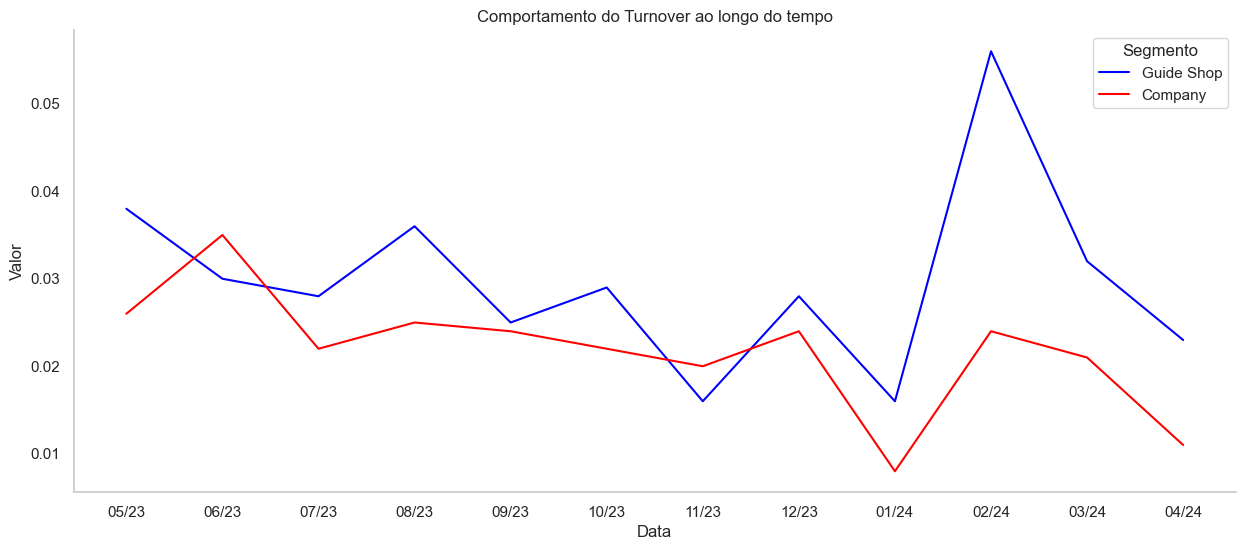

In [45]:
plt.figure(figsize=(15, 6))
custom_palette = {'Guide Shop': 'blue', 'Company':'Red'}
line_plot = sns.lineplot(x='Data', y='Valor', hue='Segmento', data=df_long, palette=custom_palette )
plt.title('Comportamento do Turnover ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
sns.despine()
plt.grid(False)

In [46]:
desligamentos = pa.get_sheets(creds, '1OPV3tEMf39yQo6teK4pQyXezbtUc5887HF5ZDdPh9OU', 'desligamentos')
desligamentos.head()

,Motivo,Percentual
1,Remuneração,"0,55"
2,Carreira e Crescimento,"0,20"
3,Motivos Pessoais,"0,17"
4,Outros,"0,08"


In [47]:
desligamentos['Percentual'] = desligamentos['Percentual'].str.replace(',','.').astype(float)


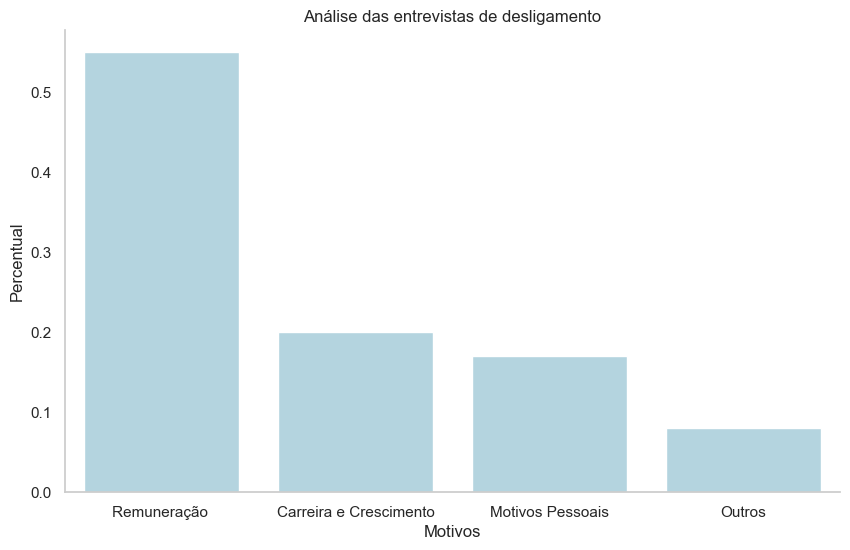

In [60]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Motivo', y='Percentual', data=desligamentos, color='lightblue')
plt.title('Análise das entrevistas de desligamento')
plt.xlabel('Motivos')
plt.ylabel('Percentual')
sns.despine()
plt.grid(False)

In [61]:
base = pa.get_sheets(creds, '1OPV3tEMf39yQo6teK4pQyXezbtUc5887HF5ZDdPh9OU', 'base')
base.head()

,Data ref,Consultor,Loja,GMV,Meta,% GMV x Meta,Atingiu gatilho?,GMV PL,Comissão PL,Comissão FT,...,GMV 1P (OUTROS),COMISSÃO 1P (OUTROS),GMV 3P,Comissão 3P,GMV Loja,Comissão Loja,GMV Montagem,Comissão Montagem,GMV MADEIRAPAY,COMISSÃO MADEIRAPAY
1,01/05/2023,João Santos,Guide Shop 1,"R$ 89.571,92","R$ 111.903,34",80%,SIM,"30.273,32","983,88","18,22",...,"14.026,42","140,26","5.662,03","35,70","140.635,26","210,95",,"12,18",,"0,00"
2,01/05/2023,Laura O. Costa,Guide Shop 1,"R$ 174.871,91","R$ 225.000,00",78%,NÃO,"21.183,94","688,48","16,15",...,"29.421,71","297,16","17.840,57","91,85","297.409,15","446,11",,"0,00",,"0,00"
3,01/05/2023,Pedro Martins Almeida,Guide Shop 2,"R$ 43.735,45","R$ 116.198,53",38%,NÃO,"46.166,63","1.614,76","42,60",...,"54.376,71","561,88","11.944,55","59,72","757.093,57","1.135,64",,"22,89",,"0,00"
4,01/06/2023,João Santos,Guide Shop 1,"R$ 99.210,55","R$ 93.322,10",106%,SIM,,"0,00","0,00",...,"517,23","5,17",,"0,00","289.404,16","434,11",,"0,00",,"0,00"
5,01/06/2023,Laura O. Costa,Guide Shop 1,"R$ 106.896,81","R$ 132.081,85",81%,SIM,"65.435,04","2.159,14","107,56",...,"75.767,32","757,67","36.756,83","186,66","756.792,08","1.135,19",,"38,79",,"0,00"


In [62]:
base.describe()

,Data ref,Consultor,Loja,GMV,Meta,% GMV x Meta,Atingiu gatilho?,GMV PL,Comissão PL,Comissão FT,...,GMV 1P (OUTROS),COMISSÃO 1P (OUTROS),GMV 3P,Comissão 3P,GMV Loja,Comissão Loja,GMV Montagem,Comissão Montagem,GMV MADEIRAPAY,COMISSÃO MADEIRAPAY
count,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
unique,9,3,2,21,19,19,2,26,26,15,...,16,16,27,27,16,16,1,11,1,2
top,01/05/2023,João Santos,Guide Shop 1,"R$ 98.123,26","R$ 111.903,34",93%,SIM,,"0,00",,...,,,"5.662,03","35,70",,,,,,"0,00"
freq,3,9,18,2,2,3,17,2,2,12,...,12,12,1,1,12,12,27,12,27,15


In [63]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 1 to 27
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data ref              27 non-null     object
 1   Consultor             27 non-null     object
 2   Loja                  27 non-null     object
 3   GMV                   27 non-null     object
 4   Meta                  27 non-null     object
 5   % GMV x Meta          27 non-null     object
 6   Atingiu gatilho?      27 non-null     object
 7   GMV PL                27 non-null     object
 8   Comissão PL           27 non-null     object
 9   Comissão FT           27 non-null     object
 10  Comissão ST           27 non-null     object
 11  GMV 1P (OUTROS)       27 non-null     object
 12  COMISSÃO 1P (OUTROS)  27 non-null     object
 13  GMV 3P                27 non-null     object
 14  Comissão 3P           27 non-null     object
 15  GMV Loja              27 non-null     obje

In [71]:
df = pa.get_sheets(creds, '1UWyVZ1XRraI3r0WbXBokB_uoxDjKopikb9fEaRaBmWs', 'BASE')
df.head()

,Data ref,Matrícula,Consultor,Loja,GMV,Meta,% GMV x Meta,Atingiu gatilho?,GMV PL,Comissão PL,...,Atingiu gatilho? 90%,Comissão real,GMV PL,GMV 1P Outros,GMV 3P,"GMV *1,05","GMV Vs Meta *1,05","Comissão * 1,05",Faixa,Performance
1,01/01/2023,3599,ADELINO JOSE DOS SANTOS,"66 - GS - Penha - São Paulo, SP","51.438,88","64.629,52","79,6%",sim,"30.273,32","983,88",...,0,"1.382,97","58,85%","27,27%","11,01%","54010,82419","83,57%","1452,119166",D,0
2,01/01/2023,2825,ADILA SOUSA MOTA,"51 - GS - Centro - Balneário Camboriú, SC","69.269,28","111.388,20","62,2%",não,"21.183,94","688,48",...,0,"1.523,60","30,58%","42,47%","25,76%","72732,74416","65,30%","1599,779658",E,0
3,01/01/2023,4053,ADRIANA DOS SANTOS PASSOS,"193 - GS - Shopping Dom Pedro - Campinas, SP","117.817,83","113.128,64","104,1%",sim,"46.166,63","1.614,76",...,1,"3.394,89","39,18%","46,15%","10,14%","123708,7219","109,35%","3564,636888",B,0
4,01/01/2023,3336,ALESSANDRA SARTORI,"75 - GS - Interlagos - São Paulo, SP","517,23","122.701,06","0,4%",não,#N/A,"0,00",...,0,"439,28",#N/A,"100,00%",#N/A,"543,0914955","0,44%","461,2424672",F,0
5,01/01/2023,4901,ALEX PIMENTEL DA SILVA,33 - GS - Shopping Interlar Aricanduva - São P...,"179.534,55","146.197,01","122,8%",sim,"65.435,04","2.159,14",...,1,"4.323,24","36,45%","42,20%","20,47%","188511,2768","128,94%","4539,397481",A,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 1 to 2723
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Data ref               2723 non-null   object
 1   Matrícula              2723 non-null   object
 2   Consultor              2723 non-null   object
 3   Loja                   2723 non-null   object
 4   GMV                    2723 non-null   object
 5   Meta                   2723 non-null   object
 6   % GMV x Meta           2723 non-null   object
 7   Atingiu gatilho?       2723 non-null   object
 8   GMV PL                 2723 non-null   object
 9   Comissão PL            2723 non-null   object
 10  Comissão FT            2723 non-null   object
 11  Comissão ST            2723 non-null   object
 12  GMV 1P (OUTROS)        2723 non-null   object
 13  COMISSÃO 1P (OUTROS)   2723 non-null   object
 14  GMV 3P                 2723 non-null   object
 15  Comissão 3P          

In [72]:
df['Data ref'] = pd.to_datetime(df['Data ref'])

In [68]:
df[['GMV']] = df[['GMV']].replace('\.','',regex=True)
df[['GMV']] = df[['GMV']].replace(',','.',regex=True)
df[['GMV']] = df[['GMV']].astype(float)

ValueError: could not convert string to float: '-'

In [73]:
df[['GMV']] = df[['GMV']].replace('\.','',regex=True)
df[['GMV']] = df[['GMV']].replace(',','.',regex=True)
df[['GMV']] = df[['GMV']].astype(float)

In [78]:
df_agrupado = df_agrupado[(df_agrupado['Data ref'] != '2023-01-09')]

In [77]:
df_agrupado = df[['Data ref', 'GMV']]
df_agrupado

,Data ref,GMV
1,2023-01-01,51438.88
2,2023-01-01,69269.28
3,2023-01-01,117817.83
4,2023-01-01,517.23
5,2023-01-01,179534.55
...,...,...
2719,2023-01-09,0.00
2720,2023-01-09,0.00
2721,2023-01-09,0.00
2722,2023-01-09,0.00


In [79]:
df_agrupado

,Data ref,GMV
1,2023-01-01,51438.88
2,2023-01-01,69269.28
3,2023-01-01,117817.83
4,2023-01-01,517.23
5,2023-01-01,179534.55
...,...,...
2439,2023-01-08,107826.00
2440,2023-01-08,49729.00
2441,2023-01-08,59300.00
2442,2023-01-08,105934.00


In [81]:
df_agrupado = df_agrupado[['Data ref', 'GMV']].groupby('Data ref').sum().reset_index()
df_agrupado

,Data ref,GMV
0,2023-01-01,34490352.91
1,2023-01-02,25717733.92
2,2023-01-03,30863938.52
3,2023-01-04,27595155.00
4,2023-01-05,26855695.94
5,2023-01-06,27191321.72
6,2023-01-07,37784535.80
7,2023-01-08,30547675.00


In [87]:
df_agrupado['GMV TOTAL SQRT'] = df_agrupado['GMV'].apply(lambda x: np.sqrt(x))
df_agrupado

,GMV,GMV TOTAL SQRT
Data ref,,
2023-01-01,34490352.91,5872.848790
2023-01-02,25717733.92,5071.265515
2023-01-03,30863938.52,5555.532245
2023-01-04,27595155.00,5253.109079
2023-01-05,26855695.94,5182.248155
2023-01-06,27191321.72,5214.529866
2023-01-07,37784535.80,6146.912705
2023-01-08,30547675.00,5526.995115


In [90]:
df_agrupado['GMV TOTAL CBRT'] = df_agrupado['GMV'].apply(lambda x: np.cbrt(x))
df_agrupado

,GMV,GMV TOTAL SQRT,GMV TOTAL CBRT
Data ref,,,
2023-01-01,34490352.91,5872.848790,325.511157
2023-01-02,25717733.92,5071.265515,295.173637
2023-01-03,30863938.52,5555.532245,313.677799
2023-01-04,27595155.00,5253.109079,302.188277
2023-01-05,26855695.94,5182.248155,299.464586
2023-01-06,27191321.72,5214.529866,300.706932
2023-01-07,37784535.80,6146.912705,335.560910
2023-01-08,30547675.00,5526.995115,312.602697


In [84]:
from statsmodels.tsa.stattools import adfuller

In [82]:
df_agrupado.set_index('Data ref', inplace=True)

In [83]:
serie_temporal = df_agrupado['GMV']

In [85]:
result = adfuller(serie_temporal)

In [86]:
result_summary = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Used lags': result[2],
    'Number of observations': result[3],
    'Critical Values': result[4]
}

for key, value in result_summary.items():
    if key == 'Critical Values':
        print(f'{key}:')
        for k, v in value.items():
            print(f'   {k}: {v}')
    else:
        print(f'{key}: {value}')

ADF Statistic: -4.6477927818572065
p-value: 0.00010535691814825279
Used lags: 2
Number of observations: 5
Critical Values:
   1%: -6.045114
   5%: -3.9292800000000003
   10%: -2.98681


In [88]:
serie_temporal = df_agrupado['GMV TOTAL SQRT']
result = adfuller(serie_temporal)

In [89]:
result_summary = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Used lags': result[2],
    'Number of observations': result[3],
    'Critical Values': result[4]
}

for key, value in result_summary.items():
    if key == 'Critical Values':
        print(f'{key}:')
        for k, v in value.items():
            print(f'   {k}: {v}')
    else:
        print(f'{key}: {value}')

ADF Statistic: -5.450004286413833
p-value: 2.657429465439966e-06
Used lags: 2
Number of observations: 5
Critical Values:
   1%: -6.045114
   5%: -3.9292800000000003
   10%: -2.98681


In [91]:
serie_temporal = df_agrupado['GMV TOTAL CBRT']
result = adfuller(serie_temporal)

In [92]:
result_summary = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Used lags': result[2],
    'Number of observations': result[3],
    'Critical Values': result[4]
}

for key, value in result_summary.items():
    if key == 'Critical Values':
        print(f'{key}:')
        for k, v in value.items():
            print(f'   {k}: {v}')
    else:
        print(f'{key}: {value}')

ADF Statistic: -5.7895506667465835
p-value: 4.908648414233879e-07
Used lags: 2
Number of observations: 5
Critical Values:
   1%: -6.045114
   5%: -3.9292800000000003
   10%: -2.98681


In [94]:
import math

In [95]:
df_agrupado['GMV TOTAL LOG'] = df_agrupado['GMV'].apply(lambda x: math.log(x))
df_agrupado

,GMV,GMV TOTAL SQRT,GMV TOTAL CBRT,GMV TOTAL LOG
Data ref,,,,
2023-01-01,34490352.91,5872.848790,325.511157,17.356190
2023-01-02,25717733.92,5071.265515,295.173637,17.062691
2023-01-03,30863938.52,5555.532245,313.677799,17.245099
2023-01-04,27595155.00,5253.109079,302.188277,17.133151
2023-01-05,26855695.94,5182.248155,299.464586,17.105988
2023-01-06,27191321.72,5214.529866,300.706932,17.118408
2023-01-07,37784535.80,6146.912705,335.560910,17.447410
2023-01-08,30547675.00,5526.995115,312.602697,17.234799


In [96]:
serie_temporal = df_agrupado['GMV TOTAL LOG']
result = adfuller(serie_temporal)

In [97]:
result_summary = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Used lags': result[2],
    'Number of observations': result[3],
    'Critical Values': result[4]
}

for key, value in result_summary.items():
    if key == 'Critical Values':
        print(f'{key}:')
        for k, v in value.items():
            print(f'   {k}: {v}')
    else:
        print(f'{key}: {value}')

ADF Statistic: -6.628155385847405
p-value: 5.8053206201312e-09
Used lags: 2
Number of observations: 5
Critical Values:
   1%: -6.045114
   5%: -3.9292800000000003
   10%: -2.98681


In [98]:
df_agrupado['GMV TOTAL DIFF'] = df_agrupado['GMV'].diff()
df_agrupado

,GMV,GMV TOTAL SQRT,GMV TOTAL CBRT,GMV TOTAL LOG,GMV TOTAL DIFF
Data ref,,,,,
2023-01-01,34490352.91,5872.848790,325.511157,17.356190,NaN
2023-01-02,25717733.92,5071.265515,295.173637,17.062691,-8772618.99
2023-01-03,30863938.52,5555.532245,313.677799,17.245099,5146204.60
2023-01-04,27595155.00,5253.109079,302.188277,17.133151,-3268783.52
2023-01-05,26855695.94,5182.248155,299.464586,17.105988,-739459.06
2023-01-06,27191321.72,5214.529866,300.706932,17.118408,335625.78
2023-01-07,37784535.80,6146.912705,335.560910,17.447410,10593214.08
2023-01-08,30547675.00,5526.995115,312.602697,17.234799,-7236860.80


In [99]:
df_agrupado['GMV TOTAL DIFF'] = df_agrupado['GMV TOTAL DIFF'].fillna(0)
df_agrupado

,GMV,GMV TOTAL SQRT,GMV TOTAL CBRT,GMV TOTAL LOG,GMV TOTAL DIFF
Data ref,,,,,
2023-01-01,34490352.91,5872.848790,325.511157,17.356190,0.00
2023-01-02,25717733.92,5071.265515,295.173637,17.062691,-8772618.99
2023-01-03,30863938.52,5555.532245,313.677799,17.245099,5146204.60
2023-01-04,27595155.00,5253.109079,302.188277,17.133151,-3268783.52
2023-01-05,26855695.94,5182.248155,299.464586,17.105988,-739459.06
2023-01-06,27191321.72,5214.529866,300.706932,17.118408,335625.78
2023-01-07,37784535.80,6146.912705,335.560910,17.447410,10593214.08
2023-01-08,30547675.00,5526.995115,312.602697,17.234799,-7236860.80


In [100]:
serie_temporal = df_agrupado['GMV TOTAL DIFF']
result = adfuller(serie_temporal)

In [101]:
result_summary = {
    'ADF Statistic': result[0],
    'p-value': result[1],
    'Used lags': result[2],
    'Number of observations': result[3],
    'Critical Values': result[4]
}

for key, value in result_summary.items():
    if key == 'Critical Values':
        print(f'{key}:')
        for k, v in value.items():
            print(f'   {k}: {v}')
    else:
        print(f'{key}: {value}')

ADF Statistic: -3.744933825862184
p-value: 0.003523723140416269
Used lags: 0
Number of observations: 7
Critical Values:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733
